# Solución: Péndulo En Movimiento

A continuación se describe análitica y computacionalmente la solución para un péndulo en movimiento.
El péndulo tiene una masa "m" y una cuerda de longitud "l" con masa despreciable, además está sujeto a un bloque de masa "M" que se mueve en la dirección "x".

Para la solución de nuestro problema debemos hallar primero las ecuaciones del movimiento y esto se hace con las ecuaciones de Lagrange.

Primero que todo debemos hallar las posiciones en las que se encuentran nuestras masas:
\begin{equation*}
x_{M}=x
\end{equation*}

\begin{equation*}
y_{M}=0
\end{equation*}

\begin{equation*}
x_{m}=x_{M}+lsin\theta
\end{equation*}

\begin{equation*}
y_{m}=-lcos\theta
\end{equation*}




Seguidamente vamos a hallar las velocidades:
\begin{equation*}
x'_M=\dot{x}
\end{equation*}

\begin{equation*}
y'_{M}=0
\end{equation*}

\begin{equation*}
x'_{m}=\dot{x}+l\dot{\theta}cos\theta
\end{equation*}

\begin{equation*}
y'_{m}=l\dot{\theta}sin\theta
\end{equation*}

Con las velocidades hallamos la energía cinética(T) y potencial(U) de nuestro sistema:
\begin{equation*}
T=\frac{1}{2}M{\dot{x}}²+\frac{1}{2}m[{\dot{x}}²+2\dot{x}\dot{\theta}lcos\theta+l²{\dot{\theta}}²]
\end{equation*}
\begin{equation*}
U=-mglcos\theta
\end{equation*}

El lagrangiano de nuestro sistema queda de la siguiente manera:
\begin{equation*}
L=T-U
\end{equation*} 
\begin{equation*}
L=\frac{1}{2}{\dot{x}}²(M+m)+m\bigg[{\dot{x}}²+2\dot{x}\dot{\theta}lcos\theta+\frac{ml²{\dot{\theta}}²}{2}\bigg]+mglcos\theta
\end{equation*}  


Aplicando las ecuaciones de Euler_Lagrange para $\theta$ y x, tenemos:
\begin{equation}
\frac{\partial{L}}{\partial{\theta}}-\frac{d}{dt}\bigg(\frac{\partial{L}}{\partial{\dot{\theta}}}\bigg)=0\quad(1)
\end{equation}

\begin{equation}
\frac{\partial{L}}{\partial{x}}-\frac{d}{dt}\bigg(\frac{\partial{L}}{\partial{\dot{x}}}\bigg)=0\quad(2)
\end{equation}

La solución  para  (1) y (2) respectivamente son:
\begin{equation*}
\ddot{\theta}=-\frac{g}{l}sin\theta-\ddot{x}\frac{cos\theta}{l}\quad(3)
\end{equation*}

\begin{equation*}
\ddot{x}=\frac{m{\dot{\theta}}²lsin\theta-m\ddot{\theta}lcos\theta}{(m+M)}\quad(4)
\end{equation*}

Como las 2 ecuaciones están acopladas, vamos a desacoplar una de las 2 y la reemplazamos en la otra ecuación
para poder bajar el orden y posteriormente solucionar con la funcion "Odeint", para nuestro caso vamos a desacoplar (3) quedando de la siguiente manera nuestras ecuaciones finales:

\begin{equation*}
\ddot{\theta}=\frac{-\frac{g}{l}sin\theta-\frac{m}{m+M}{\dot{\theta}}²cos\theta sin\theta}{\bigg[1+(\frac{m}{m+M})cos²\theta\bigg]}
\end{equation*}

\begin{equation*}
\ddot{x}=\frac{m{\dot{\theta}}²lsin\theta-m\ddot{\theta}lcos\theta}{(m+M)}
\end{equation*}

Con las ecuaciones anteriores se introducen dentro del programa que se encuentra a continuación y con esto damos
solución a nuestro problema.

In [1]:
from numpy import array, linspace
from math import sin, cos, pi,tan 
from pylab import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from vpython import sphere, scene, vector, color, arrow, text, sleep, box

arrow_size = 0.5  #Tamaño de la flechas


#Posiciones y colores de las flechas

arrow_x = arrow(pos=vector(0,0,0), axis=vector(arrow_size,0,0), color=color.red)
arrow_y = arrow(pos=vector(0,0,0), axis=vector(0,arrow_size,0), color=color.green)
arrow_z = arrow(pos=vector(0,0,0), axis=vector(0,0,arrow_size))


#parámetros

m=1 #masa péndulo
M=0.1 #masa bloque
l =1 #longitud de la cuerda
g=9.8 #aceleracion de la gravedad en la tierra
    
def pendulo (init, t):
        
    m=1 #masa péndulo
    M=0.1 #masa bloque
    l =1 #longitud de la cuerda
    g=9.8 #aceleración de la gravedad en la tierra
    
    w=init[0] #Ángulo
    x=init[1]  #Posición inicial
    
    dx=init[2] #Velocidad en x
    dw=init[3] #Velocidad 
           
    dv_w= (((-g/l)*sin(w)-(m/(m+M))*dw*dw*sin(w)*cos(w))/(1+(m/(m+M))*cos(w)*cos(w))) #Aceleración Angular
    dv_x= ((m*dw*dw*l*sin(w)-m*dv_w*l*cos(w))/(m+M) ) #aceleración x
   
    return array([dw,dx, w, x],float)
    
n_steps = 1000  #Número de pasos
t_start = 0. #Tiempo Inicial
t_final = 15. #Tiempo Final
t_delta = (t_final - t_start) / n_steps 

t = linspace(t_start, t_final, n_steps)

init= [3*pi/180., 1 ,0 ,0] #Condiciones iniciales

sol,outodeint = odeint(pendulo, init, t, full_output=True)
vww, vxx, ww, xx = sol.T

scene.range = 2 # m

x = 0.+l*sin(init[0])
y = -l*cos(init[0])
z = 0.
x2 = 0.
y2=0.

sleeptime = 0.001

#Dibujo de la masa M y las esfera del péndulo
prtcl = sphere(pos=vector(x,y,z), radius=0.1, color=color.cyan)
prtcl2 = box(size=vector(0.2,0.2,0.2),pos=vector(x2,y2,z), color=color.cyan)

time_i = 0
t_run = 0

#Código para la gráfica:
while t_run < t_final:
    sleep(sleeptime)
    prtcl.pos = vector( xx[time_i]+l*sin(ww[time_i]), -l*cos(ww[time_i]), z )
    prtcl2.pos = vector( xx[time_i],y2, z )
    t_run += t_delta
    time_i += 1
    


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Energía Cinética

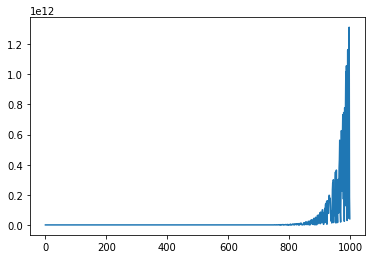

In [5]:
energy_T = []

for i in range(len(xx)):
    energy_T.append((((1/2)*(m+M)*vxx[i]*vxx[i])+(l*m*vxx[i]*vww[i]*cos(ww[i]))+((1/2)*m*l*vww[i]*vww[i])+(m*l*cos(ww[i])*g)))

plt.plot(energy_T)
plt.show()

# Energía Potencial

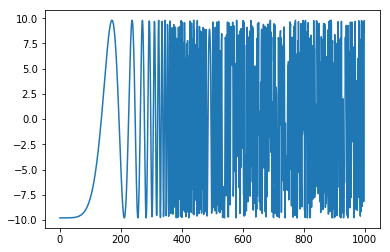

In [3]:
energy_U = []

for i in range(len(xx)):
    energy_U.append((-m*g*l*cos(ww[i])))
    
plt.plot(energy_U)
plt.show()

# Energía Total

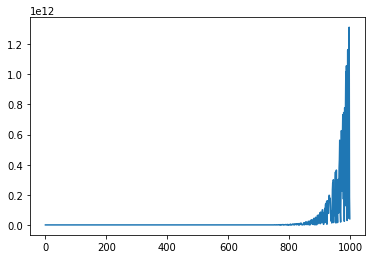

In [4]:
energy_M = []

for i in range(len(xx)):
    energy_M.append(((((1/2)*(m+M)*vxx[i]*vxx[i])+(l*m*vxx[i]*vww[i]*cos(ww[i]))+((1/2)*m*l*vww[i]*vww[i])+(m*l*cos(ww[i])*g)))+(-m*g*l*cos(ww[i])))

plt.plot(energy_M)
plt.show()